In [74]:
pip install xgboost

In [233]:
pip install lightgbm

In [648]:
import numpy as np
import pandas as pd
import pickle

from scipy.stats import chi2_contingency
from scipy.stats import probplot
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
import xgboost as xgb 
import lightgbm as lgbm
import catboost as catb
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [649]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [650]:
import warnings
warnings.simplefilter('ignore')

In [651]:
df = pd.read_csv('./course_project_train.csv')
df.sample(5)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
3450,Rent,1012871.0,1 year,0.0,20.0,10.0,162844.0,0.0,65.0,0.0,buy a car,Short Term,173756.0,138814.0,15531.0,709.0,1
5170,Rent,1577703.0,10+ years,0.0,11.0,15.4,364188.0,0.0,29.0,0.0,debt consolidation,Short Term,257906.0,263568.0,28793.0,6980.0,1
4950,Rent,1155846.0,10+ years,0.0,14.0,28.6,446688.0,0.0,48.0,0.0,medical bills,Short Term,178442.0,58254.0,4787.0,745.0,0
1500,Rent,673588.0,3 years,0.0,8.0,4.8,508222.0,0.0,NaN,0.0,buy a car,Short Term,99999999.0,61446.0,9655.0,745.0,0
2177,Rent,566542.0,< 1 year,0.0,5.0,27.4,276540.0,0.0,51.0,0.0,debt consolidation,Short Term,99999999.0,151183.0,10528.0,735.0,0


In [652]:
df.shape

(7500, 17)

In [653]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [654]:
# Путь к директориями файлам, загрузка данных
df_train = pd.read_csv('./course_project_train.csv', encoding='utf-8')
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [655]:
# Путь к директориями файлам, загрузка данных
df_test = pd.read_csv('./course_project_test.csv', encoding='utf-8')

In [656]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [657]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.0,1168386.0,1640137.00,1.014934e+07
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.0,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.0,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.5,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.5,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.0,0.0,0.00,7.000000e+00
Months since last delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.0,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.0,0.0,0.00,4.000000e+00
Current Loan Amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.0,309573.0,519882.00,1.000000e+08
Current Credit Balance,7500.0,2.898332e+05,3.178714e+05,0.0,114256.5,209323.0,360406.25,6.506797e+06


In [658]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [660]:
## Номинативные признаки
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

In [661]:
## Обзор целевой переменной
df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [662]:
## Обработка выбросов
## Credit Score имеет большой выброс по значениям

<AxesSubplot:>

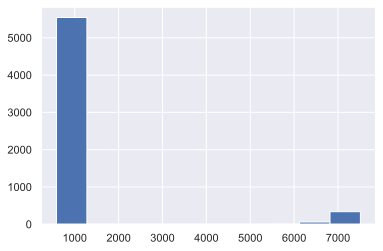

In [663]:
df['Credit Score'].hist()

<AxesSubplot:>

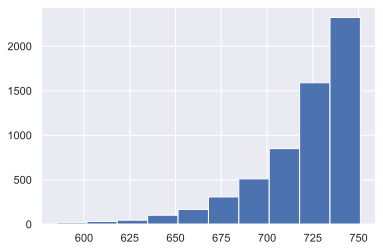

In [664]:
df['Credit Score'] = df['Credit Score'].apply(lambda x: (x / 10) if x > 760 else x)
df['Credit Score'].hist()

In [665]:
## Обработка пропусков
len(df) - df.count()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [666]:
df.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [667]:
df['Annual Income'].fillna(df['Annual Income'].mean(), inplace=True)
df['Credit Score'].fillna(df['Credit Score'].mean(), inplace=True)

In [668]:
df['Bankruptcies'].fillna(float(0), inplace=True)

In [669]:
df['Years in current job'].mode()

0    10+ years
dtype: object

In [670]:
df['Years in current job'].fillna('10+ years', inplace=True)

In [671]:
len(df) - df.count()

Home Ownership               0
Annual Income                0
Years in current job         0
Tax Liens                    0
Number of Open Accounts      0
Years of Credit History      0
Maximum Open Credit          0
Number of Credit Problems    0
Bankruptcies                 0
Purpose                      0
Term                         0
Current Loan Amount          0
Current Credit Balance       0
Monthly Debt                 0
Credit Score                 0
Credit Default               0
dtype: int64

In [672]:
# New Signs Generation 
# Nominative signs transformation_Home Ownership
df['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [673]:
df = df.join(pd.get_dummies(df['Home Ownership']))

<AxesSubplot:title={'center':'Number of Years in current job'}>

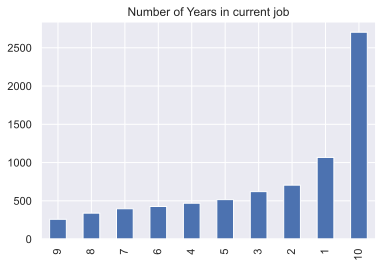

In [674]:
# Categories splitting_Years in current job
df['Years in current job'] = df['Years in current job'].str.extract(r'(\d+)')
df['Years in current job'].value_counts().sort_values(ascending = True).plot(kind='bar', title='Number of Years in current job')

In [675]:
df['Years in current job']= df['Years in current job'].astype(int)
df['Employment'] = df['Years in current job'].apply(
lambda x: 'Junior specialist' if x<=3 else ('Middle specialist' if x>3 and x<=6 else 'Senior specialist')
)

In [676]:
df['Employment'].value_counts()

Senior specialist    3697
Junior specialist    2392
Middle specialist    1411
Name: Employment, dtype: int64

In [677]:
df = df.join(pd.get_dummies(df['Employment']))

In [678]:
# Purpose is not balanced and does not give anything in forcast so it is useless. 
# Term instead of Short and Long use 0 and 1

In [679]:
df['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [680]:
df['Term'].replace(('Short Term', 'Long Term'), (0,1), inplace=True)
df['Term'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       0
3       0
4       0
       ..
7495    0
7496    1
7497    0
7498    0
7499    0
Name: Term, Length: 7500, dtype: int64>

In [681]:
# Unnecessary data removal
df = df.drop(['Home Ownership', 'Years in current job', 'Employment', 'Purpose', 'Have Mortgage'], axis=1)

In [682]:
df.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Mortgage,Own Home,Rent,Junior specialist,Middle specialist,Senior specialist
0,482087.0,0.0,11.0,26.3,685960.0,1.0,1.0,0,99999999.0,47386.0,7914.0,749.0,0,0,1,0,0,0,1
1,1025487.0,0.0,15.0,15.3,1181730.0,0.0,0.0,1,264968.0,394972.0,18373.0,737.0,1,0,1,0,0,0,1
2,751412.0,0.0,11.0,35.0,1182434.0,0.0,0.0,0,99999999.0,308389.0,13651.0,742.0,0,1,0,0,0,0,1
3,805068.0,0.0,8.0,22.5,147400.0,1.0,1.0,0,121396.0,95855.0,11338.0,694.0,0,0,1,0,0,1,0
4,776264.0,0.0,13.0,13.6,385836.0,1.0,0.0,0,125840.0,93309.0,7180.0,719.0,0,0,0,1,0,0,1


In [683]:
# Quantity signs transformation_Tax Liens
df['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
6.0       2
5.0       2
7.0       1
Name: Tax Liens, dtype: int64

In [684]:
# three categories splitting
df['Tax Liens'] = df['Tax Liens'].apply(
lambda x: 'No Tax Liens' if x==0 else ('Few Tax Liens' if x>0 and x<=2 else 'A lot of Tax Liens')
)

In [685]:
df['Tax Liens'].value_counts()

No Tax Liens          7366
Few Tax Liens          113
A lot of Tax Liens      21
Name: Tax Liens, dtype: int64

In [686]:
df = df.join(pd.get_dummies(df['Tax Liens']))

In [687]:
# Number of Credit Problems
df['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

In [688]:
# three categories splitting
df['Number of Credit Problems'] = df['Number of Credit Problems'].apply(
lambda x: 'No Credit Problems' if x==0 else ('Few Credit Problems' if x>0 and x<=2 else 'A lot of Credit Problems')
)

In [689]:
df['Number of Credit Problems'].value_counts()

No Credit Problems          6469
Few Credit Problems          975
A lot of Credit Problems      56
Name: Number of Credit Problems, dtype: int64

In [690]:
# Bankruptcies
df['Bankruptcies'].value_counts()

0.0    6674
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [691]:
# three categories splitting
df['Bankruptcies'] = df['Bankruptcies'].apply(
lambda x: 'No Bankruptcies' if x==0 else ('Few Bankruptcies' if x>0 and x<=2 else 'A lot of Bankruptcies')
)

In [692]:
df['Bankruptcies'].value_counts()

No Bankruptcies          6674
Few Bankruptcies          817
A lot of Bankruptcies       9
Name: Bankruptcies, dtype: int64

In [693]:
df = df.join(pd.get_dummies(df['Bankruptcies']))

In [694]:
# delete unnecessary columns
df = df.drop(
['Tax Liens', 'Number of Credit Problems', 'Bankruptcies', 'A lot of Tax Liens', 'A lot of Bankruptcies'],
axis=1
)

In [695]:
df.head()

,Annual Income,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Mortgage,Own Home,Rent,Junior specialist,Middle specialist,Senior specialist,Few Tax Liens,No Tax Liens,Few Bankruptcies,No Bankruptcies
0,482087.0,11.0,26.3,685960.0,0,99999999.0,47386.0,7914.0,749.0,0,0,1,0,0,0,1,0,1,1,0
1,1025487.0,15.0,15.3,1181730.0,1,264968.0,394972.0,18373.0,737.0,1,0,1,0,0,0,1,0,1,0,1
2,751412.0,11.0,35.0,1182434.0,0,99999999.0,308389.0,13651.0,742.0,0,1,0,0,0,0,1,0,1,0,1
3,805068.0,8.0,22.5,147400.0,0,121396.0,95855.0,11338.0,694.0,0,0,1,0,0,1,0,0,1,1,0
4,776264.0,13.0,13.6,385836.0,0,125840.0,93309.0,7180.0,719.0,0,0,0,1,0,0,1,0,1,0,1


In [696]:
# Left signs processing
# Average and Standard Deviation_Annual Income 
mean_income = df['Annual Income'].mean()
std_income = df['Annual Income'].std()
lowcap = mean_income - std_income
highcap = mean_income + std_income
print(lowcap, '\n', highcap)

613910.5179680055 
 2118872.9223819217


In [697]:
df['Annual Income'] = df['Annual Income'].apply(
lambda x: 'Low Income' if x<=lowcap else ('Avg Income' if x>lowcap and x<highcap else 'High Income')
)

In [698]:
df = df.join(pd.get_dummies(df['Annual Income']))

In [699]:
# Credit History Years
df['Credit History'] = df['Years of Credit History'].apply(
lambda x: 'Short Credit History' if x<=3 else ('Avg Credit History' if x>3 and x<10 else 'Long Credit History')
)

In [700]:
df = df.join(pd.get_dummies(df['Credit History']))

In [701]:
# Average and Standard Deviation_Current Loan Amount
mean_cla = df[df['Current Loan Amount'] < 999999999.0]['Current Loan Amount'].mean()
std_cla = df[df['Current Loan Amount'] < 999999999.0]['Current Loan Amount'].std()
low_cla = mean_cla - std_cla
high_cla = mean_cla + std_cla
print(low_cla, '\n', high_cla)

-20052945.52966196 
 43799300.41979529


In [702]:
df['Current Loan Amount'] = df['Current Loan Amount'].apply(
lambda x: 'Small Loan Amount' if x<=3 else ('Average Loan Amount' if x>3 and x<10 else 'Big Current Loan Amount')
)

In [703]:
df = df.join(pd.get_dummies(df['Current Loan Amount']))

In [704]:
# Splitting on several classes_Credit Score
df['Credit Score'] = df['Credit Score'].apply(lambda x: 'Low Credit History' if np.isreal(x) and x < 600 else x)
df['Credit Score'] = df['Credit Score'].apply(lambda x: 'Average Credit History' if np.isreal(x) and (x >= 600 and x < 675) else x)
df['Credit Score'] = df['Credit Score'].apply(lambda x: 'Good Credit History' if np.isreal(x) and (x >= 675 and x < 725) else x)
df['Credit Score'] = df['Credit Score'].apply(lambda x: 'Excellent Credit History' if np.isreal(x) and (x >= 725 and x < 725) else x)
df['Credit Score'] = df['Credit Score'].apply(lambda x: 'Perfect Credit History' if np.isreal(x) and (x >=775 and x <= 800) else x)

In [705]:
df['Credit Score'].value_counts()

Good Credit History       3659
Average Credit History     475
740.0                      184
747.0                      172
748.0                      163
745.0                      155
741.0                      155
742.0                      154
746.0                      153
743.0                      151
739.0                      149
737.0                      146
738.0                      144
744.0                      140
732.0                      130
734.0                      122
736.0                      122
733.0                      114
730.0                      111
728.0                      105
731.0                      103
735.0                      102
750.0                       96
725.0                       94
729.0                       91
727.0                       85
749.0                       75
726.0                       74
751.0                       62
Low Credit History          14
Name: Credit Score, dtype: int64

In [706]:
df = df.join(pd.get_dummies(df['Credit Score']))

In [707]:
# Unnecessary columns removal
df = df.drop(
['Annual Income', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score', 'Low Credit History', 'Credit History'], 
    axis=1
)

In [708]:
df.describe()

,Term,Credit Default,Home Mortgage,Own Home,Rent,Junior specialist,Middle specialist,Senior specialist,Few Tax Liens,No Tax Liens,...,744.0,745.0,746.0,747.0,748.0,749.0,750.0,751.0,Average Credit History,Good Credit History
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,0.259200,0.281733,0.484933,0.086267,0.427200,0.318933,0.188133,0.492933,0.015067,0.982133,...,0.018667,0.020667,0.020400,0.022933,0.021733,0.010000,0.012800,0.008267,0.063333,0.487867
std,0.438225,0.449874,0.499806,0.280776,0.494705,0.466094,0.390845,0.499983,0.121826,0.132476,...,0.135354,0.142275,0.141374,0.149701,0.145821,0.099505,0.112418,0.090551,0.243578,0.499886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [709]:
# Train and Test allocation
x = df.drop(columns='Credit Default')
y = df['Credit Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)

In [710]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6000, 35)
(1500, 35)
(6000,)
(1500,)


In [711]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [712]:
# Education and evaluation

In [713]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [714]:
%%time

final_model = KNeighborsClassifier()
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

ValueError: could not convert string to float: 'debt consolidation'

In [715]:
# Test data
test_df = pd.read_csv('./course_project_train.csv')

In [716]:
test_df.drop(columns = 'Months since last delinquent', axis=1, inplace=True)
test_df['Annual Income'].fillna(test_df['Annual Income'].mean(), inplace=True)
test_df['Credit Score'].fillna(test_df['Credit Score'].mean(), inplace=True)
test_df['Bankruptcies'].fillna(float(0), inplace=True)
test_df['Years in current job'].fillna('10+ years', inplace=True)

In [717]:
test_df = test_df.join(pd.get_dummies(test_df['Home Ownership']))
test_df['Years in current job'] = test_df['Years in current job'].str.extract(r"(\d+)")
test_df['Years in current job'] = test_df['Years in current job'].astype(int)
test_df['Employment'] = test_df['Years in current job'].apply(
    lambda x: 'Junior specialist' if x<=3 else ('Middle specialist' if x>3 and x<=6 else 'Senior specialist')
)
test_df = test_df.join(pd.get_dummies(test_df['Employment']))

test_df['Term'].replace(('Short Term','Long Term'),(0,1), inplace=True)

test_df = test_df.drop(['Home Ownership', 'Years in current job', 'Employment', 'Purpose', 'Have Mortgage'], axis=1)

test_df['Tax Liens'] = test_df['Tax Liens'].apply(
    lambda x: "No Tax Liens" if x==0 else ("Few Tax Liens" if x>0 and x<=2 else "Many Tax Liens")
)
test_df = test_df.join(pd.get_dummies(test_df['Tax Liens']))

test_df['Number of Credit Problems'] = test_df['Number of Credit Problems'].apply(
    lambda x: "No Credit Problems" if x==0 else ("Few Credit promblem" if x>0 and x<=2 else "Many Credit Problems")
)
test_df = test_df.join(pd.get_dummies(test_df['Number of Credit Problems']))

test_df['Bankruptcies'] = test_df['Bankruptcies'].apply(
    lambda x: "No Bankruptcies" if x==0 else ("Few Bankruptcies" if x>0 and x<=1 else "Many Bankruptcies")
)
test_df = test_df.join(pd.get_dummies(test_df['Bankruptcies']))

test_df = test_df.drop(
    ['Tax Liens', 'Number of Credit Problems', 'Bankruptcies', 'Many Tax Liens', 'Many Credit Problems', 'Many Bankruptcies'],
    axis=1
)

In [718]:
mean_income = test_df['Annual Income'].mean()
std_income = test_df['Annual Income'].std()
lowcap = mean_income - std_income
highcap = mean_income + std_income

test_df['Annual Income'] = test_df['Annual Income'].apply(
    lambda x: "Low Income" if x<=lowcap else ("Avg Income" if x>lowcap and x<highcap else "High Income")
)

test_df = test_df.join(pd.get_dummies(test_df['Annual Income']))

test_df = test_df.drop(['Annual Income'], axis=1)

In [719]:
test_df['Credit History'] = test_df['Years of Credit History'].apply(
    lambda x: "Short Credit History" if x<=3 else ("Avg Credit History" if x>3 and x<10 else "Long Credit History")
)

test_df = test_df.join(pd.get_dummies(test_df['Credit History']))

test_df = test_df.drop(['Years of Credit History', 'Credit History'], axis=1)

In [720]:
mean_cla = test_df[test_df['Current Loan Amount'] < 99999999.0]['Current Loan Amount'].mean()
std_cla = test_df[test_df['Current Loan Amount'] < 99999999.0]['Current Loan Amount'].std()
low_cla = mean_cla - std_cla
high_cla = mean_cla + std_cla

test_df['Current Loan Amount'] = test_df['Current Loan Amount'].apply(
    lambda x: "Small Loan Amt" if x<=low_cla else ("Avg Loan Amt" if x>low_cla and x<high_cla else "Big Loan Amt")
)

test_df = test_df.join(pd.get_dummies(test_df['Current Loan Amount']))

test_df = test_df.drop(['Current Loan Amount'], axis=1)

In [721]:
test_df['Credit Score'] = test_df['Credit Score'].apply(lambda x: (x / 10) if x > 800 else x)

test_df['Credit Score'] = test_df['Credit Score'].apply(lambda x: "Poor Credit Hist" if np.isreal(x) and x < 600 else x)
test_df['Credit Score'] = test_df['Credit Score'].apply(lambda x: "Avg Credit Hist" if np.isreal(x) and (x >= 600 and x < 675) else x)
test_df['Credit Score'] = test_df['Credit Score'].apply(lambda x: "Good Credit Hist" if np.isreal(x) and (x >= 675 and x < 725) else x)
test_df['Credit Score'] = test_df['Credit Score'].apply(lambda x: "Very Good Credit Hist" if np.isreal(x) and (x >= 725 and x < 775) else x)
test_df['Credit Score'] = test_df['Credit Score'].apply(lambda x: "Excellent Credit Hist" if np.isreal(x) and (x >= 775 and x <= 800) else x)

test_df = test_df.join(pd.get_dummies(test_df['Credit Score']))

In [722]:
test_df = test_df.drop(
    ['Number of Open Accounts', 'Maximum Open Credit', 
     'Current Credit Balance', 'Monthly Debt', 'Credit Score', 'Poor Credit Hist'], axis=1
)

In [724]:
def knn_alg(X_train, y_train, X_test, y_test, N):
    knn = KNeighborsClassifier(n_neighbors=N)
    knn.fit(X_train, y_train)

    try:
        knn.predict(X_test)
    except NotFittedError as e:
        print(repr(e))

In [729]:
final_preds = final_model.predict(df_test)

predicted_df = pd.DataFrame(final_preds, columns=['Credit Default'])
predicted_df.to_csv('PReshetnikova_predictions.csv', index_label='id')

ValueError: could not convert string to float: 'Rent'

In [730]:
predicted_df.head()

NameError: name 'predicted_df' is not defined

In [731]:
## 1) Глобальные переменные 
# Список категориальных переменных
cat_features = [col for col in df_train.columns if df_train[col].dtype == 'object']

In [732]:
# Список непрерывных переменных
nom_featurews = [col for col in df_train.columns if df_train[col].dtype == 'float64']

In [733]:
# Список потенциально категориальных переменных
categorize = ['Tax Liens', 'Bankruptcies', 'Number of Credit Problems']

In [734]:
# Финальный список непрерывных переменных
num_features = ['Annual Income', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 'Months since last delinquent', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score']

In [735]:
# Финальный список категориальных переменных
num_cat = ['Is_home_ownership', 'Is_stable_employment', 'Is_tax_liens', 'Is_credit_problems', 'Is_debt_consolidation', 'Is_longterm_credit']

In [736]:
# Кроссвалидация
cv = StratifiedKFold(n_splits=3, random_state=43, shuffle=True)

In [737]:
## 2) Используемые функции
# График оценки статистической частоты
def estimate_frequency_plot(data, variables, font_scale, figsize, style):
    sns.set(font_scale=font_scale)
    plt.figure(figsize=figsize)
    plt.style.use(style)
    
    for i, feature in enumerate(variables):
        counts = data[feature].value_counts()
        
        plt.subplot(3, 2, i+1)
        plt.title(feature)
        sns.barplot(counts.index, counts.values)                       

In [738]:
# График оценки доли переменной в разрезе целевой переменной
def estimate_share_plot(data, variables, font_scale, figsize, style, hue):
    sns.set(font_scale=font_scale)
    plt.figure(figsize=figsize)
    plt.style.use(style)
    
    for i, feature in enumerate(variables):
        plt.subplot(3, 2, i+1)
        plt.title(feature)
        sns.countplot(x=feature, hue=hue, data=data)

In [739]:
# График доверительного интервала с расчётом 
def confidence_interval_plot(data, variables, font_scale, figsize, style, capsize, target):
    sns.set(font_scale=font_scale)
    plt.figure(figsize=figsize)
    plt.style.use(style)
    
    for i, feature in enumerate(variables):
        
        plt.subplot(4, 3 , i+1)
        sns.pointplot(x=target, y=feature, data=data, capsize=capsize)
        plt.title('95 процентный доверительный интервал для' + ' ' + feature);

In [740]:
# График оценки распределения 
def qq_plot(data, variables, figsize):
    plt.figure (figsize=figsize)
    
    for i, feature in enumerate(variables):
        
        plt.subplot(4, 3 , i+1)
        probplot(data[feature], dist='norm', plot=plt);
        plt.title('Распределение' + ' ' + feature);

In [741]:
# Расчёт критерия согласия Хи-квадрат Пирсона
def calc_chi2(data, target, values, feature, category1, category2, aggfunc):
    table = data.loc[data[feature].isin([category1, category2]), [values, feature, target]]
    table[values] = table.index
    chi2_table = table.pivot_table(values = values,
                                   index = feature,
                                   columns = target,
                                   aggfunc = aggfunc)
    chi2, p, dof, expected = chi2_contingency(chi2_table, correction = False)
    
    if p < treshold:
        print(f'Разделение на категории {category1} & {category2} for {feature} статистически значимо')
    else:
        print(f'Разделение на категории {category1} & {category2} for {feature} статистически бессмыслено')

In [742]:
# Расчёт критерия Шапиро-Уилка
def calc_shapiro(data, variables, treshold, target):
    for feature in data[variables]:
        feature_with_target = data[[feature, target]]
        feature = feature_with_target[feature]
        stat, p = shapiro(feature)
        
        if p < treshold:
            print(f'Гипотеза о нормальном распределении для {feature} отвергается')
        else:
            print(f'Гипотеза о нормалном распределении для {feature} принимается')

In [743]:
# Проверка гипотез о зависимости признаков с целевой переменной
def dependency_hypo(data, variables, treshold, target):
    
    for feature in data[variables]:
        feature_with_target = data[[feature, target]]
        feature_ = feature_with_target[feature]
        stat, p = shapiro(feature_)
        
        feature_0 = feature_[feature_with_target[target] == 0]
        feature_1 = feature_[feature_with_target[target] == 1]
        
        if p < treshold:
            stat, p_= mannwhitneyu(feature_0, feature_1)
            
            if p_< treshold:
                print(f'Гипотеза о равенстве мат.ожиданий для {feature} отвергается')
            else:
                print(f'Гипотеза о равенстве мат.ожиданий для {feature} принимается')            
        else:
            stat, p_=ttest_ind(feature_0, feature_1)
                
            if p_< treshold:
                print(f'Гипотеза о равенстве мат.ожиданий для {feature} отвергается')
            else:
                print(f'Гипотеза о равенстве мат.ожиданий для {feature} принимается')

In [744]:
# График для оценки корреляции
def cor_plot(data, method):
    plt.figure(figsize = (14,14))
    
    sns.set(font_scale=1)
    sns.heatmap(data.corr(method).round(2), annot=True, linewidths=.5, cmap='coolwarm')
    plt.title('Матрица корреляций');

In [745]:
# Отчёт по оценке модели 
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFISION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [746]:
# Отчёт по коэффициентам логита
def get_coef_report(data, model):
    count = 0
    for column in data.columns:
        print((np.round(model.coef[0][count], decimals=3)), column)
        count += 1

In [747]:
# Баллансировка классов
def balance_df_by_target(df, target_name):
    
    target_counts = df[target_name].value_counts()
    
    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()
    
    disbalance_coef = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1
    
    for i in range(disbalance_coef):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index = True)
        
        return df.sample(frac=1)

In [748]:
# Функции для создания новых признаков 
# Функции для создания новых признаков_квадраты непрерывных признаков
def parabolize(data, power, features):
    for i in features:
        name = i + 'power'
        data[name] = np.power(data[i], power)

In [750]:
# Функции для создания новых признаков_логарифмы непрерывных признаков
def get_log(data, features):
    for i in features:
        name = i + 'log'
        data[name] = np.log(data[i])

In [749]:
# График кривых валидации и обучения
def show_learning_curve_plot (estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,
                                                            cv=cv,
                                                            scoring='f1',
                                                            train_sizes=train_sizes,
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(15,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
             label='Training score')
    plt. plot(train_sizes, test_scores_mean, 'o-', color='g',
              label='Cross-validation score')
    
    plt.title(f'Learning curves ({type(estimator).__name__})')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [751]:
# График для оценки калибровки классов
# def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    # preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))
    
    # thresholds = []
    # precisions = []
    # recalls = []
    # f1_scores = []
    
    # for threshold in np.linspace(0.1, 0.9, 9):
        # thresholds.append(threshold)
        # precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        # recalls.append(recall_score(y_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        # f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
                       
    # scores_table = pd.DataFrame({'f1':f1_scores,
                                # 'precision':precisions,
                                # 'recall':recalls,
                                # 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
                    
    # figure = plt.figure(figsize = (15, 5))
                    
    # plt1 = figure.add_subplot(121)
    # plt1.axhline(0.5, color='red')
    # plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    # plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    # plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    # plt1.set_ylabel('Scores')
    # plt1.set_xlabel('Probability threshold')
    # plt1.set_title('Probabilites threshold celibration')
    # plt1.legend(bbox_to_anchor=(0.25, 0.25))
    # plt1.table(cellText = scores_table.values,
      #          colLabels = scores_table.columns,
        #        colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])
                       
    # plt2 = figure.add_subplot(122)
    # plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0],
      #         label='Another class', color='royalblue', alpha=0.5)
    # plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0],
              # label='Main class', color='darkcyan', alpha=0.8)
    #  plt2.set_ylabel('Number of examples')
    #  plt2.set_xlabel('Probabilities')
    #  plt2.set_title('Probability histogram')
    #  plt2.legend(bbox_to_anchor=(1, 1))
                       
    #  plt.show()

SyntaxError: invalid syntax (<ipython-input-751-3445d634cc3a>, line 14)

In [752]:
# График feature importance
def show_feature_importances(feature_names, feature_importances, get_top=None):
      feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
      feature_importances = feature_importances.sort_values('importance', ascending=False)
                    
      plt.figure(figsize = (20, len(feature_importances) * 0.355))
                
      sns.barplot(feature_importances['importance'], feature_importances['feature'])
                       
      plt.xlabel('Importance')
      plt.title('Importance of features')
      plt.show()
        
      if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

In [843]:
## 3. Анализ данных и проверка гипотез
## 3_1 Анализ категориальных признаков

#  estimate_frequency_plot(df, cat_features, 0.9, (18,18), 'seaborn-white')

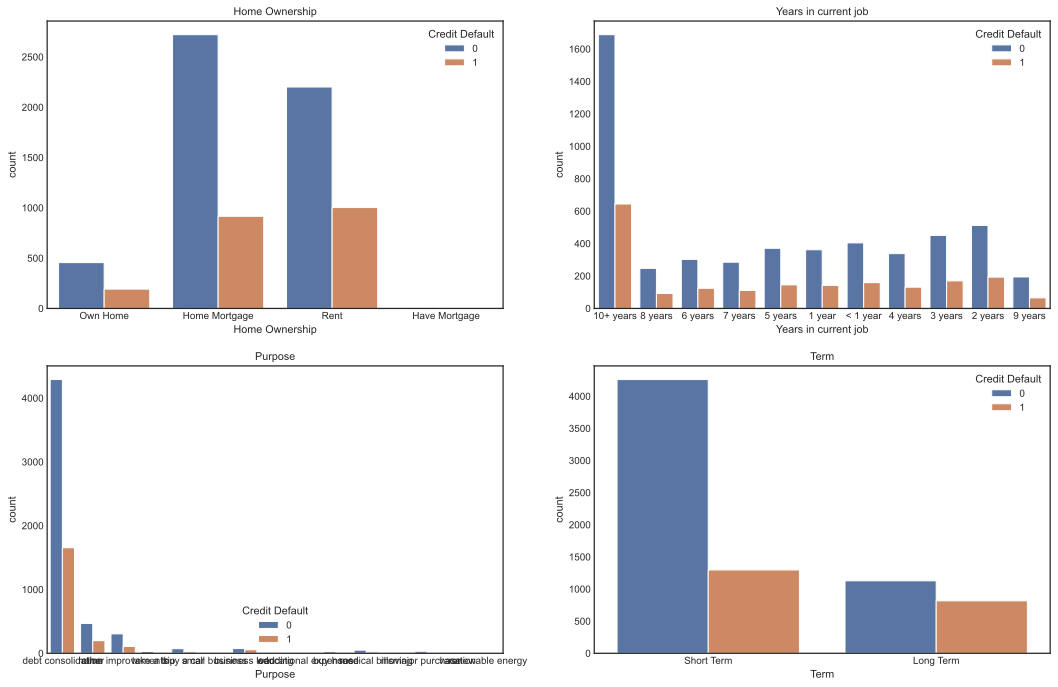

In [754]:
estimate_share_plot(df_train, cat_features, 0.9, (18,18), 'seaborn-white', 'Credit Default')

In [844]:
#  calc_chi2(data=df_train, target='Credit Default', values='id', 
         #  feature='Home Ownership', category1='Own Home',
         #  category2='Rent', aggfunc='count')

In [845]:
#  calc_chi2(data=df_train, target='Credit Default', values='id',
         #  feature='Home Ownership', category1='Rent',
         #  category2='Home Mortgage', aggfunc='count')

In [846]:
#  calc_chi2(data=df_train, target='Credit Default', values='id',
         #  feature='Years in current job', category1='10+ years',
         # category2='1 year', aggfunc='count')

In [847]:
#  calc_chi2(data=df_train, target='Credit Default', values='id',
         #  feature='Term', category1='Short Term',
         #  category2='Long Term', aggfunc='count')

In [759]:
df_train.rename(columns={'Home Ownership': 'Is_home_ownership',
                        'Years in current job': 'Is_stable_employment',
                        'Purpose': 'Is_debt_consolidation'},
               inplace=True)

In [760]:
df_test.rename(columns={'Home Ownership': 'Is_home_ownership',
                        'Years in current job': 'Is_stable_employment',
                        'Purpose': 'Is_debt_consolidation'},
               inplace=True)

In [761]:
df_train['Is_home_ownership'] = df_train['Is_home_ownership'].replace({'Home Mortgage': 1, 'Own Home': 1,
                                                                      'Have Mortgage': 1, 'Rent': 0})
df_test['Is_home_ownership'] = df_test['Is_home_ownership'].replace({'Home Mortgage': 1, 'Own Home': 1,
                                                                      'Have Mortgage': 1, 'Rent': 0})

In [762]:
df_train['Is_stable_employment'] = df_train['Is_stable_employment'].replace({'2 years': 1, '3 years': 1, '< 1 year': 1,
                                                                            '5 years': 1, '1 year': 1, '4 years': 1,
                                                                            '6 years': 1, '7 years': 1, '8 years': 1,
                                                                            '9 years': 1, '10+ years': 0})
df_test['Is_stable_employment'] = df_test['Is_stable_employment'].replace({'2 years': 1, '3 years': 1, '< 1 year': 1,
                                                                            '5 years': 1, '1 year': 1, '4 years': 1,
                                                                            '6 years': 1, '7 years': 1, '8 years': 1,
                                                                            '9 years': 1, '10+ years': 0})

In [763]:
df_train.rename(columns={'Term': 'Is_longterm_credit'},
               inplace=True)
df_test.rename(columns={'Term': 'Is_longterm_credit'},
               inplace=True)

In [764]:
df_train['Is_longterm_credit'] = df_train['Is_longterm_credit'].replace({'Short Term': 1, 'Long Term': 0})
df_test['Is_longterm_credit'] = df_test['Is_longterm_credit'].replace({'Short Term': 1, 'Long Term': 0})

In [765]:
df_train['Is_home_ownership'] = df_train['Is_home_ownership'].astype('str')
df_train['Is_stable_employment'] = df_train['Is_stable_employment'].astype('str')
df_train['Is_debt_consolidation'] = df_train['Is_debt_consolidation'].astype('str')
df_train['Is_longterm_credit'] = df_train['Is_longterm_credit'].astype('str')

In [766]:
df_test['Is_home_ownership'] = df_test['Is_home_ownership'].astype('str')
df_test['Is_stable_employment'] = df_test['Is_stable_employment'].astype('str')
df_test['Is_debt_consolidation'] = df_test['Is_debt_consolidation'].astype('str')
df_test['Is_longterm_credit'] = df_test['Is_longterm_credit'].astype('str')

In [767]:
nom_features = [col for col in df_train.columns if df_train[col].dtype == 'float64']

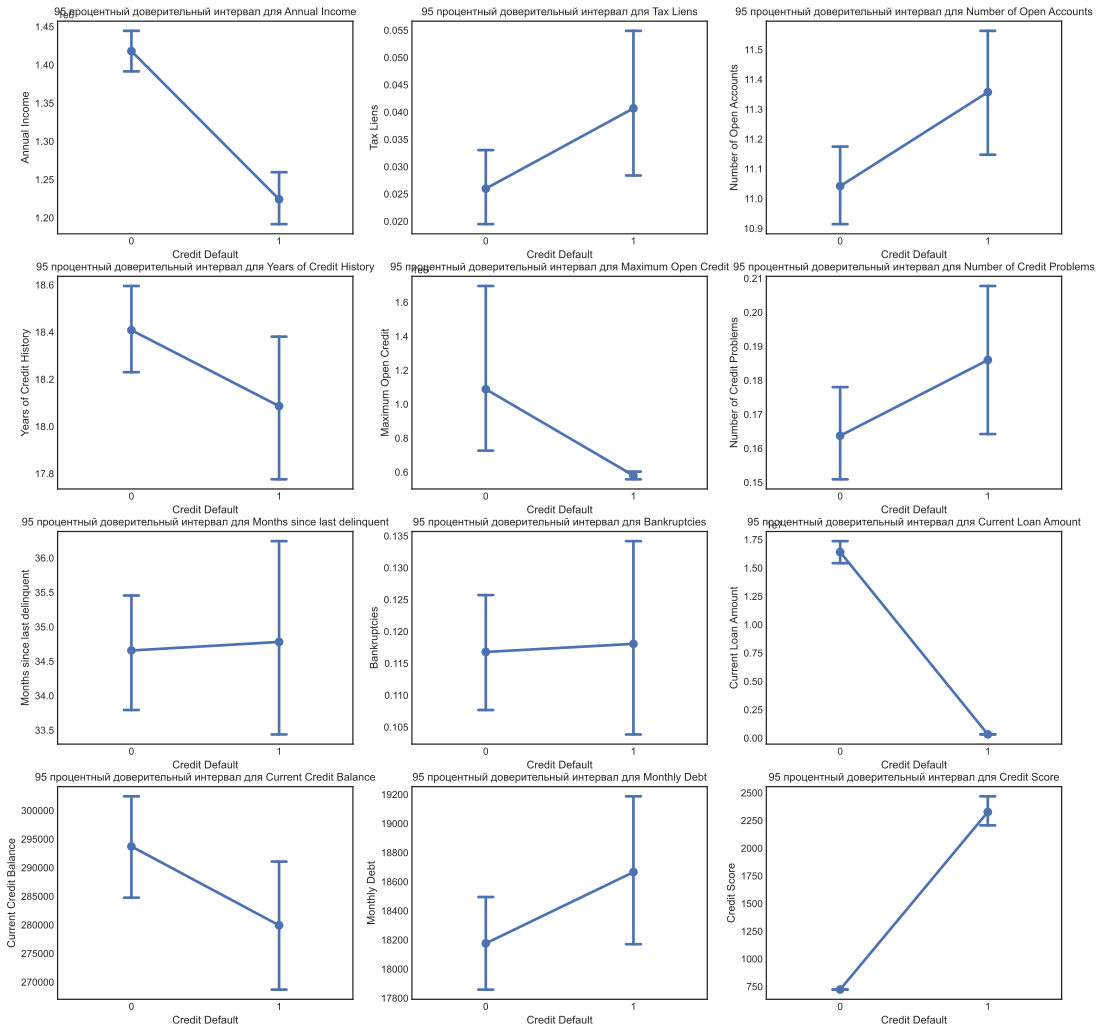

In [768]:
# 3_2 Анализ непрерывных признаков
# Построение доверительных интервалов для средних значений каждой из двух групп и их сравнение
# Доверительный интервал - тип интервальной оценки, которая задаёт числовое границы, в которых с определённой вероятностью находится истинное значение оцениваемого параметра.

confidence_interval_plot(data=df_train, variables=nom_features,
                        font_scale=0.9, figsize=(18,18),
                        style='seaborn-white', capsize=.1,
                        target='Credit Default');

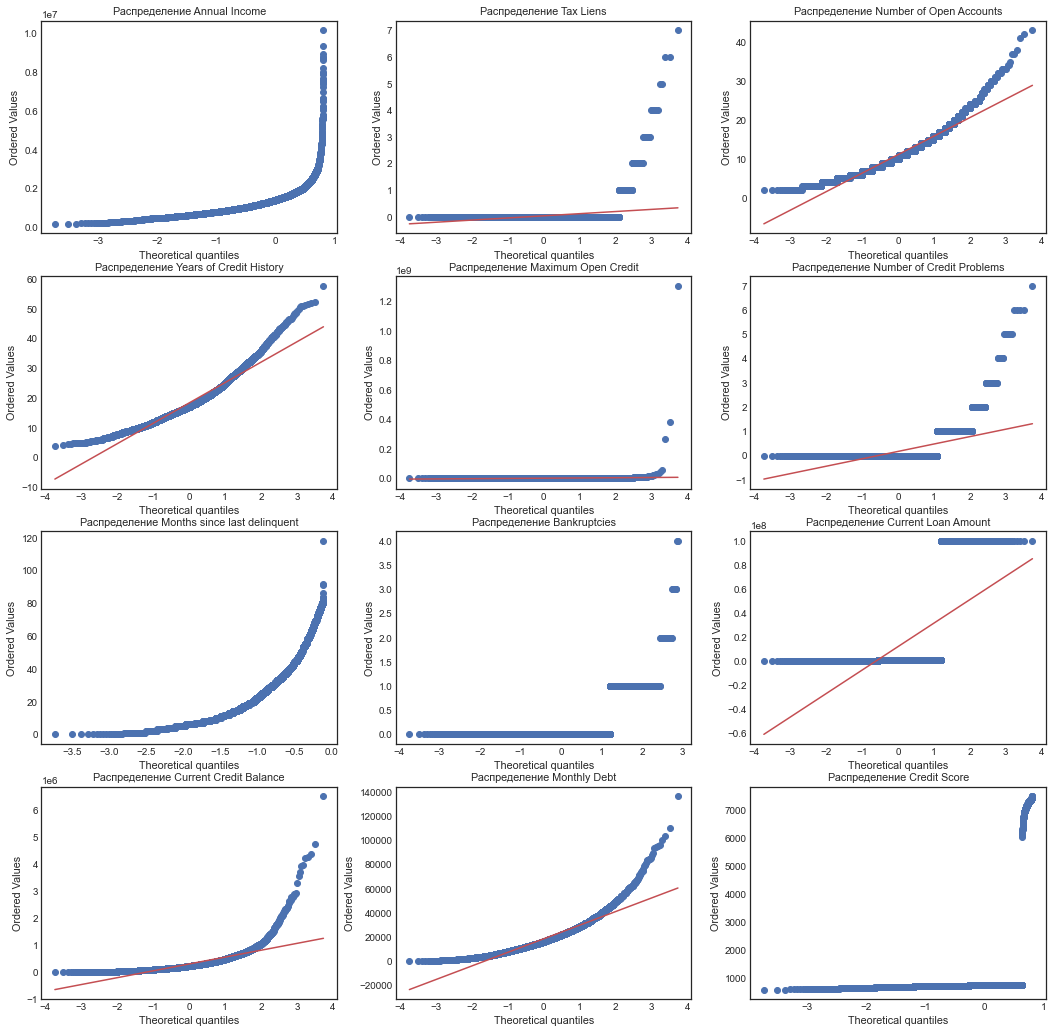

In [394]:
qq_plot(df_train, nom_features, figsize=(18,18))

In [769]:
calc_shapiro(data=df_train, variables=nom_features,
            treshold=0.05, target='Credit Default')

Гипотеза о нормалном распределении для 0        482087.0
1       1025487.0
2        751412.0
3        805068.0
4        776264.0
          ...    
7495     402192.0
7496    1533984.0
7497    1878910.0
7498          NaN
7499          NaN
Name: Annual Income, Length: 7500, dtype: float64 принимается
Гипотеза о нормальном распределении для 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7495    0.0
7496    0.0
7497    0.0
7498    0.0
7499    0.0
Name: Tax Liens, Length: 7500, dtype: float64 отвергается
Гипотеза о нормальном распределении для 0       11.0
1       15.0
2       11.0
3        8.0
4       13.0
        ... 
7495     3.0
7496    10.0
7497    12.0
7498    21.0
7499     8.0
Name: Number of Open Accounts, Length: 7500, dtype: float64 отвергается
Гипотеза о нормальном распределении для 0       26.3
1       15.3
2       35.0
3       22.5
4       13.6
        ... 
7495     8.5
7496    26.5
7497    32.1
7498    26.5
7499     9.4
Name: Years of Credit History, Le

In [770]:
dependency_hypo(data=df_train, variables=nom_features, treshold=0.05, target='Credit Default')

Гипотеза о равенстве мат.ожиданий для Annual Income принимается
Гипотеза о равенстве мат.ожиданий для Tax Liens отвергается
Гипотеза о равенстве мат.ожиданий для Number of Open Accounts отвергается
Гипотеза о равенстве мат.ожиданий для Years of Credit History отвергается
Гипотеза о равенстве мат.ожиданий для Maximum Open Credit отвергается
Гипотеза о равенстве мат.ожиданий для Number of Credit Problems принимается
Гипотеза о равенстве мат.ожиданий для Months since last delinquent принимается
Гипотеза о равенстве мат.ожиданий для Bankruptcies принимается
Гипотеза о равенстве мат.ожиданий для Current Loan Amount отвергается
Гипотеза о равенстве мат.ожиданий для Current Credit Balance принимается
Гипотеза о равенстве мат.ожиданий для Monthly Debt отвергается
Гипотеза о равенстве мат.ожиданий для Credit Score принимается


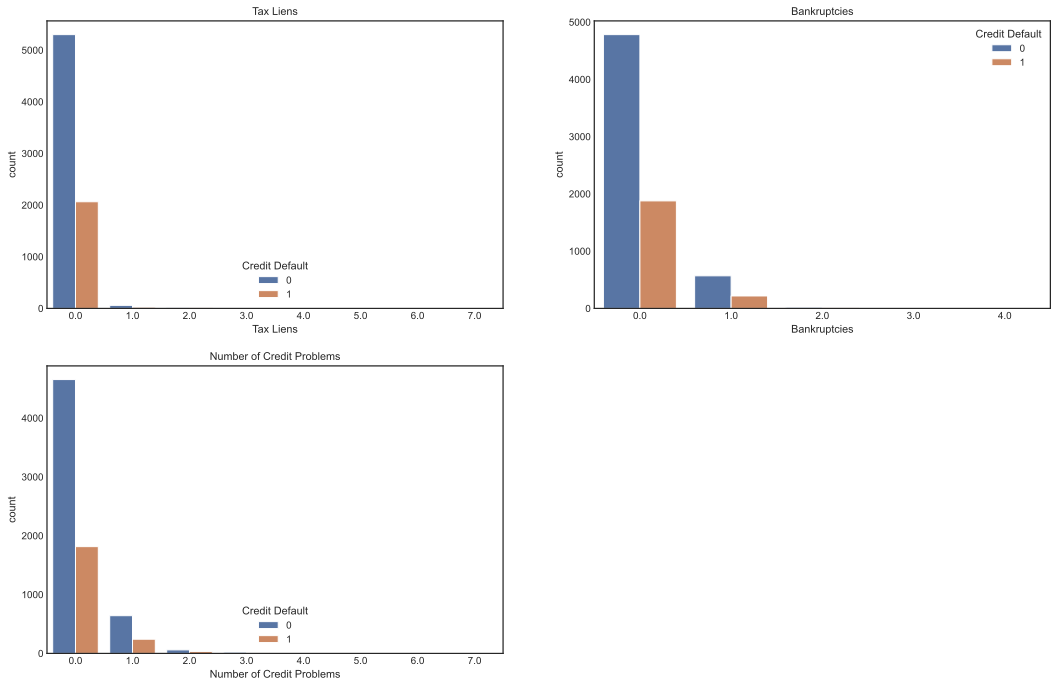

In [771]:
estimate_share_plot(df_train, categorize, 0.9, (18,18), 'seaborn-white', 'Credit Default')

In [848]:
#  calc_chi2(data=df_train, target='Credit Default', values='id',
         #  feature='Number of Credit Problems', category1='0.0',
         #  category2='1.0', aggfunc='count', treshold=0.05)

In [849]:
#  calc_chi2(data=df_train, target='Credit Default', values='id',
         #  feature='Bankruptcies', category1='0.0',
         #  category2='1.0', aggfunc='count', treshold=0.05)

In [774]:
df_train.rename(columns={'Tax Liens': 'Is_tax_liens',
                        'Bankruptcies': 'Is_bankruptcies',
                        'Number of Credit Problems': 'Is_credit_problems'},
               inplace=True)

In [775]:
df_test.rename(columns={'Tax Liens': 'Is_tax_liens',
                        'Bankruptcies': 'Is_bankruptcies',
                        'Number of Credit Problems': 'Is_credit_problems'},
               inplace=True)

In [776]:
df_train['Is_tax_liens'] = df_train['Is_tax_liens'].replace({0.0: 1, 1.0: 0, 2.0: 0,
                                                            3.0: 0, 4.0: 0, 5.0: 0,
                                                            6.0: 0, 7.0: 0})

In [777]:
df_test['Is_tax_liens'] = df_test['Is_tax_liens'].replace({0.0: 1, 1.0: 0, 2.0: 0,
                                                            3.0: 0, 4.0: 0, 5.0: 0,
                                                            6.0: 0, 7.0: 0})

In [778]:
df_train['Is_bankruptcies'] = df_train['Is_bankruptcies'].replace({0.0: 1, 1.0: 0, 2.0: 0,
                                                                  3.0: 0, 4.0: 0, 5.0: 0,
                                                                  6.0: 0})
df_test['Is_bankruptcies'] = df_test['Is_bankruptcies'].replace({0.0: 1, 1.0: 0, 2.0: 0,
                                                                  3.0: 0, 4.0: 0, 5.0: 0,
                                                                  6.0: 0})

In [779]:
df_train['Is_credit_problems'] = df_train['Is_credit_problems'].replace({0.0: 1, 1.0: 0, 2.0: 0,
                                                                        3.0: 0, 4.0: 0, 5.0: 0,
                                                                        6.0: 0, 7.0: 0})
df_test['Is_credit_problems'] = df_test['Is_credit_problems'].replace({0.0: 1, 1.0: 0, 2.0: 0,
                                                                        3.0: 0, 4.0: 0, 5.0: 0,
                                                                        6.0: 0, 7.0: 0})

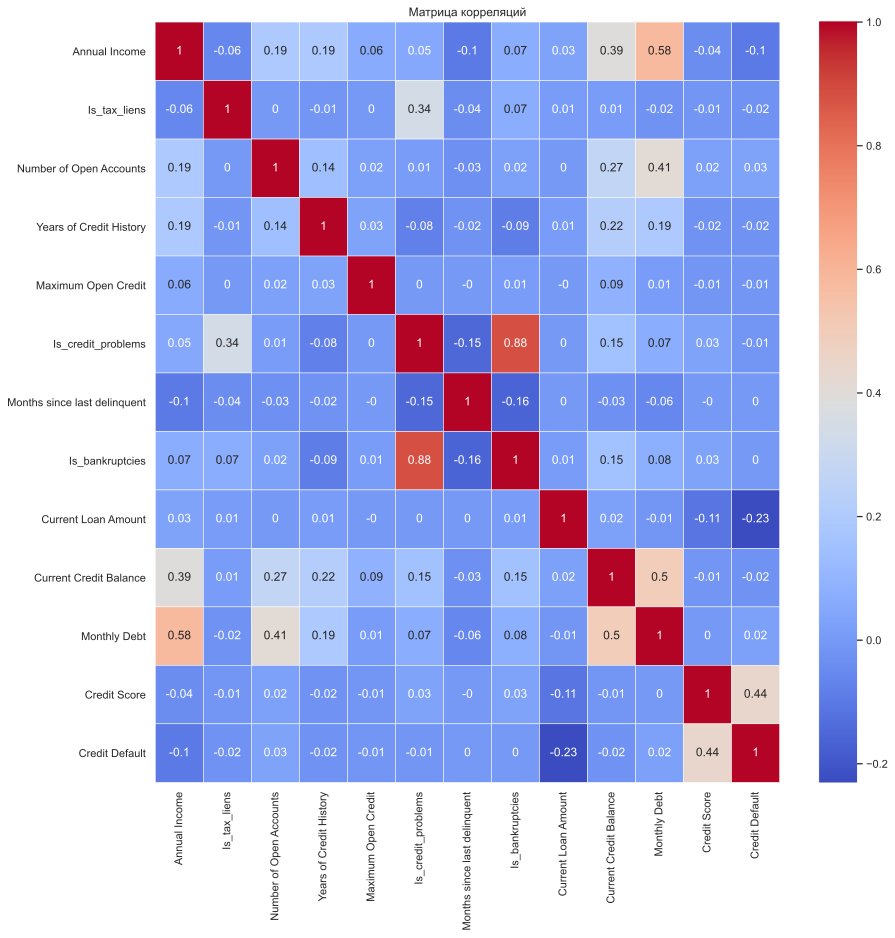

In [780]:
# 3.3 Анализ признакового пространства
# Проверка наличия мультиколлинеарности при помощи корееляции Пирсона для непрерывных признаков и корреляции Спирмэна для категориальных признаков
cor_plot(data=df_train, method='pearson');

In [781]:
# 3.4 Заполнение пропущенных значений
# Заполнение пропусков в непрерывных признаках для избежания выбросов
df_train.loc[df_train['Annual Income'].isna(), 'Annual Income'] = df_train['Annual Income'].median()
df_train.loc[df_train['Credit Score'].isna(), 'Credit Score'] = df_train['Credit Score'].median()

In [782]:
df_test.loc[df_train['Annual Income'].isna(), 'Annual Income'] = df_test['Annual Income'].median()
df_test.loc[df_train['Credit Score'].isna(), 'Credit Score'] = df_test['Credit Score'].median()

In [783]:
# Заполнение модой категориальных признаков
df_train.loc[df_train['Is_stable_employment'].isna(), 'Is_stable_employment'] = df_train['Is_stable_employment'].mode()[0]
df_train.loc[df_train['Is_bankruptcies'].isna(), 'Is_bankruptcies'] = df_train['Is_bankruptcies'].mode()[0]

In [784]:
df_test.loc[df_test['Is_bankruptcies'].isna(), 'Is_bankruptcies'] = df_test['Is_bankruptcies'].mode()[0]

In [785]:
# Сохранение предобработанного датасета
df_train.to_csv('train_processed.csv', encoding='utf-8', index=False)
df_test.to_csv('test_processed.csv', encoding='utf-8', index=False)

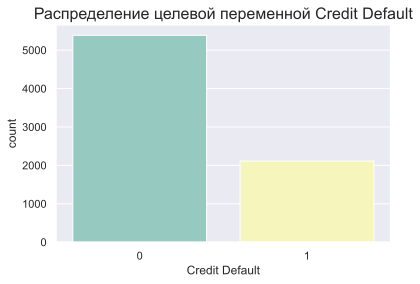

In [786]:
# 3.5 Анализ целевой переменной
sns.countplot(x='Credit Default', data = df_train, palette='Set3')
plt.title('Распределение целевой переменной Credit Default', fontsize=16);

In [787]:
df_train['Credit Default'].value_counts(normalize=True)

0    0.718267
1    0.281733
Name: Credit Default, dtype: float64

In [788]:
# 3.6 Гипотезы и выводы
# Переменные Home Ownership, Years in current job, Purpose не имеют статистической значимости разделения на предлагаемые категории на уровне значимости 0.05. Переменная Term доля целевой переменной в предлагаемых группах не одинакова. Лучше оставить только одну группу, применив one hot encoding.
# Переменные Months since last delinquent & Bankruptcies не значимы для построения имодели на 95%
# Tax Liens, Bankruptcies Number of credit problems являются категориальными, так как имеют ступенчатое распределение. Они приводятся к категориальным с одной группой при помощи one hot encoding. Может не значимы для модели
# По парному коэффициенту корреляции Пирсона была обнаружена незначительная частичная мультиколлинеарность и слабая линейная связь между признаками и целевой переменной. Возможность существования нелинейных взаимосвязей.
# Балансировка классов может улучшить качество модели
# Бэйзлайн - построение логической регрессии и дерева решений  для финальной оценки взаимосвязей и проверки результатов статистических гипотез.

In [789]:
# Бэйзлайн
df_train = pd.read_csv('train_processed.csv', encoding='utf-8')
df_train.head()

,Is_home_ownership,Annual Income,Is_stable_employment,Is_tax_liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Is_credit_problems,Months since last delinquent,Is_bankruptcies,Is_debt_consolidation,Is_longterm_credit,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,1,482087.0,NaN,1.0,11.0,26.3,685960.0,0.0,NaN,0.0,debt consolidation,1,99999999.0,47386.0,7914.0,749.0,0
1,1,1025487.0,0.0,1.0,15.0,15.3,1181730.0,1.0,NaN,1.0,debt consolidation,0,264968.0,394972.0,18373.0,737.0,1
2,1,751412.0,1.0,1.0,11.0,35.0,1182434.0,1.0,NaN,1.0,debt consolidation,1,99999999.0,308389.0,13651.0,742.0,0
3,1,805068.0,1.0,1.0,8.0,22.5,147400.0,0.0,NaN,0.0,debt consolidation,1,121396.0,95855.0,11338.0,694.0,0
4,0,776264.0,1.0,1.0,13.0,13.6,385836.0,0.0,NaN,1.0,debt consolidation,1,125840.0,93309.0,7180.0,719.0,0


In [790]:
df_train.loc[df_train['Is_stable_employment'].isna(), 'Is_stable_emplyment'] = df_train['Is_stable_employment'].mode()[0]

In [791]:
df_norm = df_train.copy()

In [792]:
# Масштабирование непрерывных признаков
scaler = StandardScaler()
df_norm[num_features] = scaler.fit_transform(df_norm[num_features])

In [793]:
df_norm.head()

,Is_home_ownership,Annual Income,Is_stable_employment,Is_tax_liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Is_credit_problems,Months since last delinquent,Is_bankruptcies,Is_debt_consolidation,Is_longterm_credit,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Is_stable_emplyment
0,1,-1.114304,NaN,1.0,-0.026674,1.133645,-0.016174,0.0,NaN,0.0,debt consolidation,1,2.760520,-0.762772,-0.872085,-0.218932,0,1.0
1,1,-0.396190,0.0,1.0,0.788223,-0.428528,0.014763,1.0,NaN,1.0,debt consolidation,0,-0.363620,0.330781,0.004909,-0.227276,1,NaN
2,1,-0.758385,1.0,1.0,-0.026674,2.369181,0.014807,1.0,NaN,1.0,debt consolidation,1,2.760520,0.058379,-0.391034,-0.223799,0,NaN
3,1,-0.687478,1.0,1.0,-0.637847,0.593985,-0.049781,0.0,NaN,0.0,debt consolidation,1,-0.368118,-0.610282,-0.584980,-0.257174,0,NaN
4,0,-0.725543,1.0,1.0,0.380774,-0.669954,-0.034902,0.0,NaN,1.0,debt consolidation,1,-0.367978,-0.618292,-0.933631,-0.239791,0,NaN


In [794]:
# Создание отложенной выборки
y = df_norm['Credit Default']
X = df_norm.drop('Credit Default', axis=1)

In [795]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25,
                                                   random_state=42)

In [796]:
# 4.1 Логистическая регрессия
lr = LogisticRegression(penalty='11',
                       tol=1e-8,
                       C=1e-2,
                       class_weight='balanced',
                       random_state=42,
                       max_iter=400,
                       n_jobs=-1,
                       )

In [850]:
#  lr.fit(X_train, y_train)

#  y_train_pred = lr.predict(X_train)
#  y_test_pred = lr.predict(X_test)

#  get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [851]:
# Коэффициенты при переменных, значимые и незначимые признаки
#  get_coef_report(X, lr)

In [799]:
# 4.2 Дерево решений
features = ['Is_home_ownership',
           'Annual Income',
           'Is_stable_employment',
           'Is_tax_liens',
           'Number of Open Accounts',
           'Years of Credit History',
           'Maximum Open Credit',
           'Is_credit_problems',
            # 'Months since last delinquent'
            #'Is_bankruptcies',
           'Is_debt_consolidation',
           'Is_longterm_credit',
           'Current Loan Amount',
           'Current Credit Balance', 
           'Monthly Debt',
           'Credit Score',
           'Credit Default']

In [800]:
y = df_train['Credit Default']
X = df_train[features].drop('Credit Default', axis=1)

In [801]:
dt = DecisionTreeClassifier(max_features='sqrt', random_state=42,
                           class_weight='balanced', min_impurity_split=1e-3,
                           criterion='gini')

In [802]:
dt_params = {'max_depth': np.arange(6, 15),
            'min_samples_leaf': np.arange(1, 5),
            'max_leaf_nodes': [100, 500, 1000]}

In [852]:
#  %%time

#  gs = GridSearchCV(dt, dt_params, scoring='f1', n_jobs=-1, cv=cv)
# gs.fit(X, y)

In [804]:
gs.best_score_

nan

In [805]:
# Значение целевой метрики оказалось ниже, чем в логистической регрессии. Подтвердилось наличие нелинейной взаимосвязи

In [806]:
# 4.3 Ансамблевые алгоритмы
y = df_train['Credit Default']
X = df_train[features].drop('Credit Default', axis=1)

In [807]:
%%time

random_state = 18
classifiers = []

classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(random_state=random_state))
classifiers.append(xgb.XGBClassifier(random_state=random_state))
classifiers.append(lgbm.LGBMClassifier(random_state=random_state))
classifiers.append(catb.CatBoostClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X, y = y, scoring = 'f1', cv=cv, n_jobs=-1))
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_res = pd.DataFrame({'CrossValMeans':cv_means, 'CrossValerrors': cv_std, 'Algorithm':[
    'RandomForest', 'GradientBoosting', 'MultipleLayerPerception', 'AdaBoost', 'XGB', 'LGBM', 'CatBoost'
]})

Wall time: 3.03 s


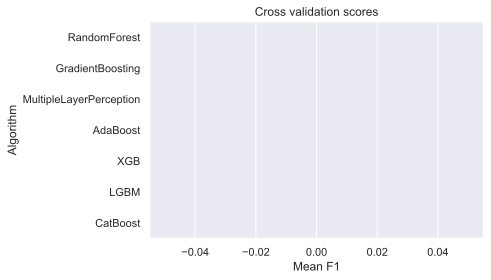

In [808]:
g = sns.barplot('CrossValMeans', 'Algorithm', data = cv_res, palette='Set3', orient = 'h', **{'xerr':cv_std})
g.set_xlabel('Mean F1')
g = g.set_title('Cross validation scores')

In [809]:
# Все алгоритмы имеют приблизительно одинаковый результат, за исключением XGBoost

In [810]:
# 5. Создание новых признаков
# 5_1. Квадраты непрерывных переменных 
# 5_2. Логарифмы непрерывных переменных

In [811]:
# 5_1. Квадраты непрерывных переменных 
parabolize(df_train, 2, num_features)

In [812]:
# 5_2. Логарифмы непрерывных переменных
get_log(df_train, num_features)

In [813]:
df_train.to_csv('train_features.csv', encoding='utf-8', index=False)

In [814]:
# 6. Настройка гиперпараметров
df_train = pd.read_csv('train_features.csv', encoding='utf-8')
df_train.head()

,Is_home_ownership,Annual Income,Is_stable_employment,Is_tax_liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Is_credit_problems,Months since last delinquent,Is_bankruptcies,...,Credit Scorepower,Annual Incomelog,Number of Open Accountslog,Years of Credit Historylog,Maximum Open Creditlog,Months since last delinquentlog,Current Loan Amountlog,Current Credit Balancelog,Monthly Debtlog,Credit Scorelog
0,1,482087.0,NaN,1.0,11.0,26.3,685960.0,0.0,NaN,0.0,...,561001.0,13.085880,2.397895,3.269569,13.438575,NaN,18.420681,10.766082,8.976389,6.618739
1,1,1025487.0,0.0,1.0,15.0,15.3,1181730.0,1.0,NaN,1.0,...,543169.0,13.840678,2.708050,2.727853,13.982490,NaN,12.487364,12.886570,9.818637,6.602588
2,1,751412.0,1.0,1.0,11.0,35.0,1182434.0,1.0,NaN,1.0,...,550564.0,13.529709,2.397895,3.555348,13.983086,NaN,18.420681,12.639117,9.521568,6.609349
3,1,805068.0,1.0,1.0,8.0,22.5,147400.0,0.0,NaN,0.0,...,481636.0,13.598682,2.079442,3.113515,11.900905,NaN,11.706813,11.470592,9.335915,6.542472
4,0,776264.0,1.0,1.0,13.0,13.6,385836.0,0.0,NaN,1.0,...,516961.0,13.562248,2.564949,2.610070,12.863168,NaN,11.742767,11.443672,8.879055,6.577861


In [815]:
# Финальный список категориальных переменных.
new_cat = ['Is_home_ownership', 'Is_stable_employment', 'Is_tax_liens', 'Is_credit_problems',
           'Is_debt_consolidation', 'Is_longterm_credit']

In [853]:
# 6.1 Light GBM
#  for feature in new_cat:
    #  df_train[feature] = df_train[feature].astype('int32')

In [817]:
y = df_train['Credit Default']
X = df_train.drop('Credit Default', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=21)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5250, 35), (2250, 35), (5250,), (2250,))

In [854]:
#  %%time

#  model_lightgbm = lgbm.LGBMClassifier(random_state=42,
                                     #  boosting_type='dart',
                                     #  metric='logloss',
                                     #  silent=False,
                                     #  scoring='f1',
                                     #  learning_rate=0.07,
                                     #  max_depth=3,
                                     #  min_data_in_leaf=15,
                                     #  num_leaves=5,
                                     #  num_iterations=100,
                                     #  is_unbalance=True,
                                     #  data_random_seed=17,
                                     #  feature_fraction=0.95)

#  model_lightgbm.fit(X_train, y_train, categorical_feature=new_cat)

#  y_train_pred = model_lightgbm.predict(X_train)
# y_test_pred = model_lightgbm.predict(X_test)

#  get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

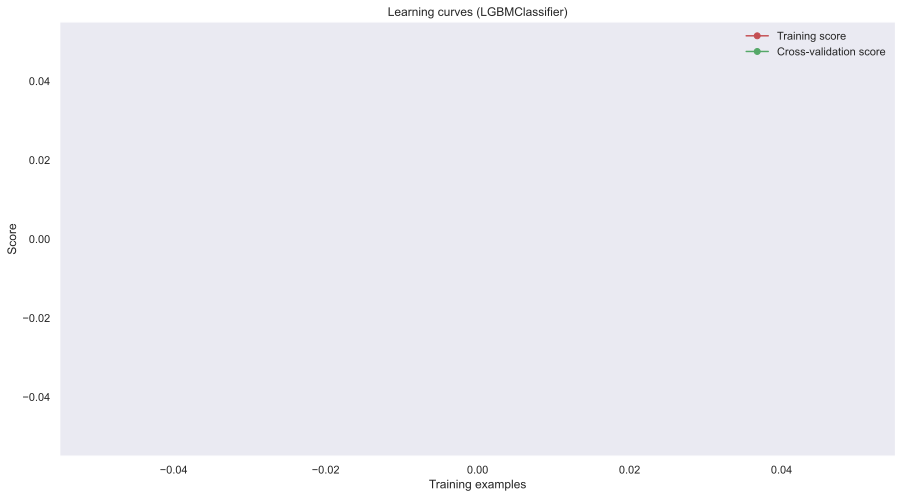

In [819]:
# Кривые валидации и обучения
show_learning_curve_plot(model_lightgbm, X, y)

In [855]:
# Порог вероятности
#  y_test_proba = model_lightgbm.predict_proba(X_test)[:, 1]

In [856]:
#  show_proba_calibration_plots(y_test_proba, y_test)

In [857]:
# Отбор признаков по feature_importance
# important_features_top = show_feature_importances(X_train.columns, model_lightgbm.feature_importances_, get_top=12)

In [822]:
%%time

model_lightgbm = lgbm.LGBMClassifier(random_state=42,
                                    boosting_type='dart',
                                    metric='logloss',
                                    silent=False,
                                    scoring='f1',
                                    learning_rate=0.07,
                                    max_depth=3,
                                    min_data_in_leaf=15,
                                    num_leaves=5,
                                    num_iterations=100,
                                    is_unbalance=True,
                                    data_random_seed=17,
                                    feature_fraction=0.95)

model_lightgbm.fit(X_train[important_features_top], y_train)

y_train_pred = model_lightgbm.predict(X_train[important_features_top])
y_test_pred = model_lightgbm.predict(X_test[important_features_top])

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

NameError: name 'important_features_top' is not defined

In [823]:
# Балансировка привела к переобучению. Классификация по roc_auc

In [824]:
with open('model_lgbm.picle', 'wb') as f:
    pickle.dump(model_lightgbm, f)

In [825]:
# AdaBoost
X_train = X_train.replace([-np.inf, np.inf], [0, 0])
X_test = X_test.replace([-np.inf, np.inf], [0, 0])

In [ ]:
# Обучение с отобранными признаками с RandomForest в роли base estimator. Настройка скорости обучения и количества листьев


In [828]:
%%time

gs = GridSearchCV(dt, dt_params, scoring='f1', n_jobs=-1, cv=cv)
gs.fit(X, y)

ValueError: could not convert string to float: 'debt consolidation'

In [858]:
# %%time

# ada = AdaBoostClassifier(RandomForestClassifier(max_depth=1, min_samples_leaf=5, criterion='gini',
                                               #  min_samples_split=5, class_weight='balanced',
                                               #  max_leaf_nodes=80,
                                               #  random_state=42, n_jobs=-1),
                         #  algorithm='SAMME.R', random_state=42,
                        #  learning_rate=0.2, n_estimators=32)
#  ada.fit(X_train[important_features_top], y_train)

#  y_train_pred = ada.predict(X_train[important_features_top])
#  y_test_pred = ada.predict(X_test[important_features_top])

#  get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [830]:
# Precision и Recall немного отличаются
# Алгоритм строит только разделяющую гиперплоскость поэтому невозможно провести калибровку

with open ('ada.pickle', 'wb') as f:
    pickle.dump(ada, f)

In [859]:
# 7. Ensemble modelling

#  lr = lr.fit(X_train[important_features_top], y_train)
#  lgbm = model_lightgbm.fit(X_train[important_features_top], y_train)
#  ada = ada.fit(X_train[important_features_top], y_train)

In [860]:
#  model0 = pd.Series(lr.predict(X_test[important_features_top]), name='lr')
#  model1 = pd.Series(lgbm.predict(X_test[important_features_top]), name='lgbm')
#  model2 = pd.Series(ada.predict(X_test[important_features_top]), name='ada')

In [861]:
#  ensemble_results = pd.concat([model0, model1, model2], axis=1)

In [862]:
# Оценка взаимосвязи результатов классификации при помощи кореляции Пирсона
#  cor_plot(ensemble_results, method='pearson')

In [836]:
# Сильно кореелируют результаты LGBM и AdaBoost. Можно попробовать улучшить модель

In [863]:
#  %%time

# vote = VotingClassifier(estimators=[('lr', lr), ('lgbm', lgbm)],
                       #  voting='soft',
                       #  n_jobs=-1,
                       #  weights=[0.5, 10])

#  vote.fit(X_train[important_features_top], y_train)
#  y_train_pred = vote.predict(X_train[important_features_top])
#  y_test_pred = vote.predict(X_train[important_features_top])

#  get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [864]:
# Результаты остались почти неизменными 
# Порог вероятности
#  y_test_proba = vote.predict_proba(X_test[important_features_top])[:, 1]
#  show_proba_calibration_plots(y_test_proba, y_test)

In [839]:
# LGBM
test_df = pd.read_csv('test_processed.csv', encoding='utf-8')
test_df.head()

,Is_home_ownership,Annual Income,Is_stable_employment,Is_tax_liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Is_credit_problems,Months since last delinquent,Is_bankruptcies,Is_debt_consolidation,Is_longterm_credit,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,0,NaN,1.0,1.0,9.0,12.5,220968.0,1.0,70.0,1.0,debt consolidation,1,162470.0,105906.0,6813.0,NaN
1,0,231838.0,1.0,1.0,6.0,32.7,55946.0,1.0,8.0,1.0,educational expenses,1,78298.0,46037.0,2318.0,699.0
2,1,1152540.0,1.0,1.0,10.0,13.7,204600.0,1.0,NaN,1.0,debt consolidation,1,200178.0,146490.0,18729.0,7260.0
3,1,1220313.0,0.0,1.0,16.0,17.0,456302.0,1.0,70.0,1.0,debt consolidation,1,217382.0,213199.0,27559.0,739.0
4,1,2340952.0,1.0,1.0,11.0,23.6,1207272.0,1.0,NaN,1.0,debt consolidation,0,777634.0,425391.0,42605.0,706.0


In [840]:
parabolize(test_df, 2, ['Credit Score', 'Annual Income', 'Current Loan Amount'])

In [865]:
# model_lightgbm.fit(df_train[important_features_top], df_train['Credit Default'])
# y_pred = model_lightgbm.predict(df_test[important_features_top])
# is_default = pd.DataFrame(y_pred, columns=['Credit Default'])
# is_default.to_csv('final_predictions.csv')